# WeatherPy
----


In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.


In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?"
number= 0

name=[]
lat=[]
lon=[]
temp=[]
max_temp=[]
wind_spd=[]
clouds=[]
humidity=[]

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&units=imperial&q=" + city

    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    number=number+1

    try:
        print(f"{number}: {weather_json['name']}")
        name.append(weather_json['name'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        temp.append(weather_json['main']['temp'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_spd.append(weather_json['wind']['speed'])
        clouds.append(weather_json['clouds']['all'])
        humidity.append(weather_json['main']['humidity'])
        
    except:
        print("Missing name data")
        name.append("Missing data")
        lat.append("Missing data")
        lon.append("Missing data")
        temp.append("Missing data")
        max_temp.append("Missing data")
        wind_spd.append("Missing data")
        clouds.append("Missing data")
        humidity.append("Missing data")

1: Arraial do Cabo
2: Matara
3: Prainha
4: Punta Arenas
5: Yaan
6: Saldanha
7: Kazachinskoye
8: Hobart
9: Puerto Ayora
10: Pisco
11: East London
12: New Norfolk
13: Codrington
Missing name data
15: Khatanga
16: Kurumkan
17: Bluff
18: Pereira Barreto
19: Fairbanks
20: Ancud
21: Copiapó
22: Takoradze
23: Hermanus
24: Kapaa
25: Purranque
Missing name data
27: Hofn
28: Killybegs
29: Olafsvik
30: Bredasdorp
31: Maamba
32: Brønnøysund
33: Klaksvík
34: Ribeira Grande
35: Fortuna
Missing name data
37: Kutno
38: Naze
39: Waingapu
40: Sabha
41: Flin Flon
42: Butaritari
43: Quelimane
44: Manaure
45: Richards Bay
46: Nohfelden
47: Ushuaia
48: Aleksandrov Gay
49: Kozhva
50: Boz
51: Qaanaaq
52: Rognan
53: Faya
54: Tasiilaq
55: San Cristobal
56: Ati
57: Chokurdakh
58: Lebu
59: Sharjah city
60: Sisimiut
Missing name data
62: Rikitea
63: Westport
64: Abu Kamal
65: Manaus
66: Mataura
Missing name data
Missing name data
69: Uvinza
70: Busselton
71: Ürümqi
72: Eureka
73: Berdigestyakh
74: Jamestown
75: No

### Convert Raw Data to DataFrame
* Export the city data into a .csv.


In [11]:
city_data = {
    'city': name,
    'latitude':lat,
    'longitude':lon,
    'temperature':temp,
    'max temperature':max_temp,
    'wind speed':wind_spd,
    'cloudiness':clouds,
    'humidity':humidity
}

original_city_df = pd.DataFrame(city_data)
original_city_df.head()

,city,latitude,longitude,temperature,max temperature,wind speed,cloudiness,humidity
0,Arraial do Cabo,-22.9661,-42.0278,76.86,80.56,19.57,0,73
1,Matara,5.9485,80.5353,78.64,78.64,8.08,11,81
2,Prainha,-1.8,-53.48,88.61,88.61,2.68,57,54
3,Punta Arenas,-53.15,-70.9167,33.91,39.22,37.98,90,93
4,Yaan,7.3833,8.5667,75.36,75.36,3.36,95,83


In [12]:
city_df = original_city_df.loc[original_city_df['latitude'] != 'Missing data']
city_df.count()

city               572
latitude           572
longitude          572
temperature        572
max temperature    572
wind speed         572
cloudiness         572
humidity           572
dtype: int64

In [13]:
city_df.to_csv('output_data/cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----

In [14]:
humid = city_df.loc[city_df['humidity'] > 100]
humid.count()

city               0
latitude           0
longitude          0
temperature        0
max temperature    0
wind speed         0
cloudiness         0
humidity           0
dtype: int64

## Plotting the Data


### Latitude vs. Temperature Plot

In [15]:
city_lat = city_df['latitude']
city_temp = city_df['temperature']
city_humidity = city_df['humidity']
city_cloud = city_df['cloudiness']
city_wind =city_df['wind speed']

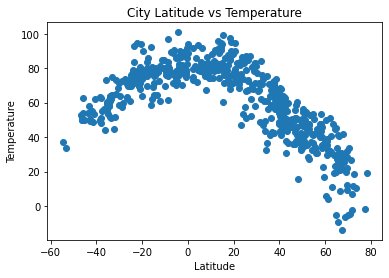

In [16]:
plt.scatter(city_lat,city_temp)

plt.title("City Latitude vs Temperature")
plt.ylabel("Temperature")
plt.xlabel("Latitude")

plt.savefig("lat-temp.png")
plt.show()

As you would expect, the cities closer to the equator have higher temperatures. It is interesting that those closer to the North Pole have lower temperatures than those closer to the South Pole. That could be due to fewer cities selected in the Southern Hemisphere, though.

### Latitude vs. Humidity Plot

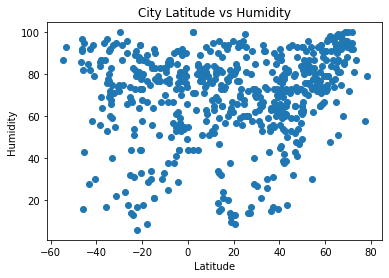

In [17]:
plt.scatter(city_lat,city_humidity)

plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.savefig("lat-hum.png")
plt.show()

There doesn't seem to be much correlation between humidity and latitude. This isn't too surprising as there are rain-heavy/very-humid regions all over the globe, just like there are deserts scattered around. 

### Latitude vs. Cloudiness Plot

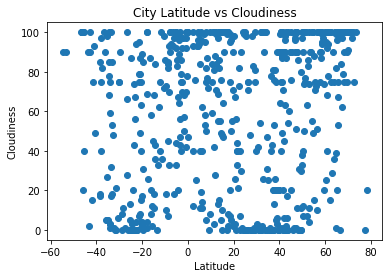

In [18]:
plt.scatter(city_lat,city_cloud)

plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.savefig("lat-cloud.png")
plt.show()

Much like humidity, there isn't much correlation between cloudiness and latitude. I am curious about the straight lines of points that appeared. My guess would be something in how the cloudiness is calculated that results in the multiple cities having the same exact measurement.

### Latitude vs. Wind Speed Plot

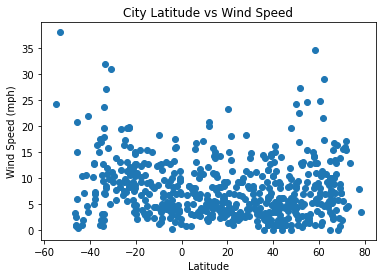

In [19]:
plt.scatter(city_lat,city_wind)

plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.savefig("lat-wind.png")
plt.show()

Not much correlation between the two factors here, either, though it does show that most of the cities selected tend to not have very high wind-speeds.

### Linear Regression

In [20]:
#Ran into error that regression model couldn't use the type the fields were set to, need to change to float

city_df['latitude']=city_df['latitude'].astype(float)
city_df['longitude']=city_df['longitude'].astype(float)
city_df['temperature']=city_df['temperature'].astype(float)
city_df['max temperature']=city_df['max temperature'].astype(float)
city_df['wind speed']=city_df['wind speed'].astype(float)
city_df['cloudiness']=city_df['cloudiness'].astype(float)
city_df['humidity']=city_df['humidity'].astype(float)

city_df.dtypes



<ipython-input-20-9e2c01d31959>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['latitude']=city_df['latitude'].astype(float)
<ipython-input-20-9e2c01d31959>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['longitude']=city_df['longitude'].astype(float)
<ipython-input-20-9e2c01d31959>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

city                object
latitude           float64
longitude          float64
temperature        float64
max temperature    float64
wind speed         float64
cloudiness         float64
humidity           float64
dtype: object

In [21]:
north = city_df.loc[city_df['latitude'] >= 0]
south = city_df.loc[city_df['latitude'] < 0]

north_lat = north['latitude']
north_temp = north['max temperature']
north_hum = north['humidity']
north_wind = north['wind speed']
north_cloud =north['cloudiness']

south_lat = south['latitude']
south_temp = south['max temperature']
south_hum = south['humidity']
south_wind = south['wind speed']
south_cloud =south['cloudiness']

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7786890748747989


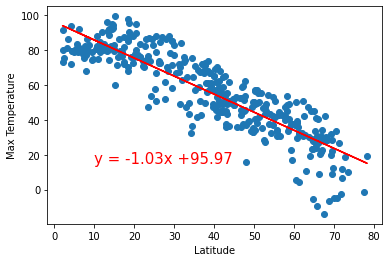

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(north_lat, north_temp)
plt.plot(north_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../north_temp-lat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6237195500583886


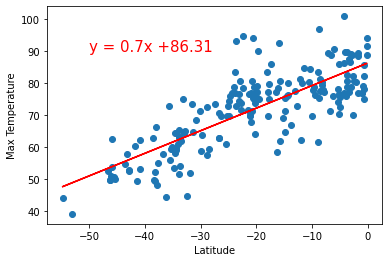

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(south_lat, south_temp)
plt.plot(south_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../south_temp-lat.png")
plt.show()

The regression here is showing a high correlation between latitude and temperature, namely that the closer to the equator that you get, the higher the temperature. The correlation is, oddly, stronger in the northern hemisphere than the southern (0.73 vs 0.6 r-value).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08333618093944194


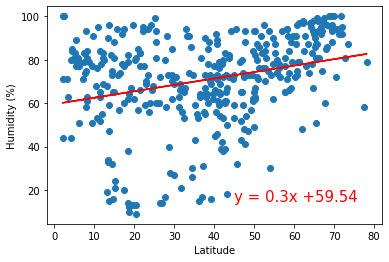

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_hum)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(north_lat, north_hum)
plt.plot(north_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../north_lat-hum.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.010175281297826936


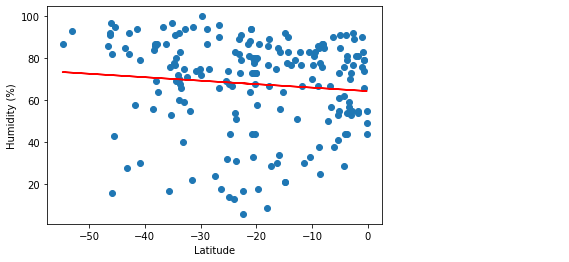

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_hum)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(south_lat, south_hum)
plt.plot(south_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../south_hum-lat.png")
plt.show()

The regression model for humidity shows that there is essentially no correlation between humidity and latitude. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03111228663020767


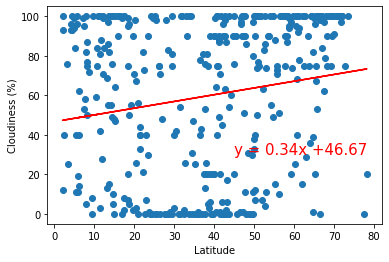

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloud)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(north_lat, north_cloud)
plt.plot(north_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(45,30),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../north_lat-cloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.020433025968186826


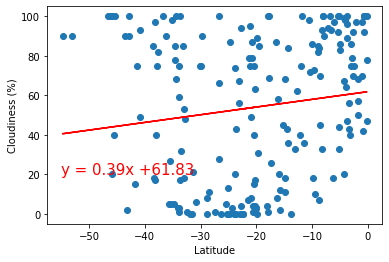

In [27]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloud)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(south_lat, south_cloud)
plt.plot(south_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../south_lat-cloud.png")
plt.show()

There is minimal correlation between latitude and cloudiness. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.010547952478279879


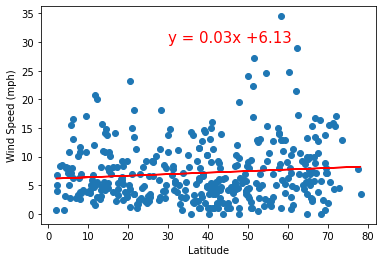

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(north_lat, north_wind)
plt.plot(north_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(30,30),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../north_lat-wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.06948286907498673


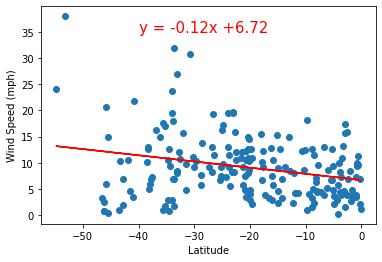

In [29]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(south_lat, south_wind)
plt.plot(south_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-40,35),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../south_lat-wind.png")
plt.show()

The correlation between wind speed and latitude is very similar for both the northern and southern hemispheres. Unfortunately, there is still no strong correlation between these two factors